# Тестовое задание на тренинг в компанию EPAM Systems



# Health care: Data set on Heart attack possibility

![heartache_picture](https://www.zdorovieinfo.ru/wp-content/uploads/2019/02/shutterstock_1131956183-1.jpg)

# В презентации необходимо описать:

- Какая бизнес-задача решается и к какой задаче ML она сведена.

- Результаты разведывательного анализа данных (EDA): обнаруженные особенности и какие-то замечания по данным.

- Пояснить, какие новые признаки созданы и как осуществлялся отбор признаков для модели.

- Какие метрики качества модели выбраны и почему.

- Какая модель машинного обучения применена и почему выбрана именно она. Можно использовать несколько моделей и сравнить их между собой.

- Как предложенное решение может быть использовано в реальных условиях. Интерпретируемость прогнозов модели.

- Предложения по улучшению предложенного решения "на будущее"

# Датасет:
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

# Оглавление тетрадки
1. [Постановка задачи](#introduction)
2. [Результаты разведывательного анализа данных (EDA)](#eda)
3. [Выбор метрик качества](#metrics)
4. [Предсказывающие модели](#models)
5. [Интерпретация результата](#result)
5. [Предложения по улучшению](#improvement)

## Постановка задачи <a name="introduction"></a>

About data set  
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information  
1. **age**  
2. **sex**: (1-male, 0-female)  
3. **cp**: chest pain type (4 values)  
4. **trestbps**: resting blood pressure  
5. **chol**: serum cholestoral in mg/dl  
6. **fbs**: fasting blood sugar > 120 mg/dl  
7. **restecg**: resting electrocardiographic results (values 0,1,2)  
8. **thalach**: maximum heart rate achieved  
9. **exang**: exercise induced angina  
10. **oldpeak**: ST depression induced by exercise relative to rest  
11. **slope**: the slope of the peak exercise ST segment  
12. **ca**: number of major vessels (0-3) colored by flourosopy  
13. **thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect  
14. **target**: 0= less chance of heart attack 1= more chance of heart attack 

## Результаты разведывательного анализа данных (EDA) <a name="eda"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#from pylab import rcParams

%matplotlib inline
#sns.set_style("ticks")
#rcParams['figure.figsize'] = 12, 6

In [2]:
df=pd.read_csv('data/heart.csv')

In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


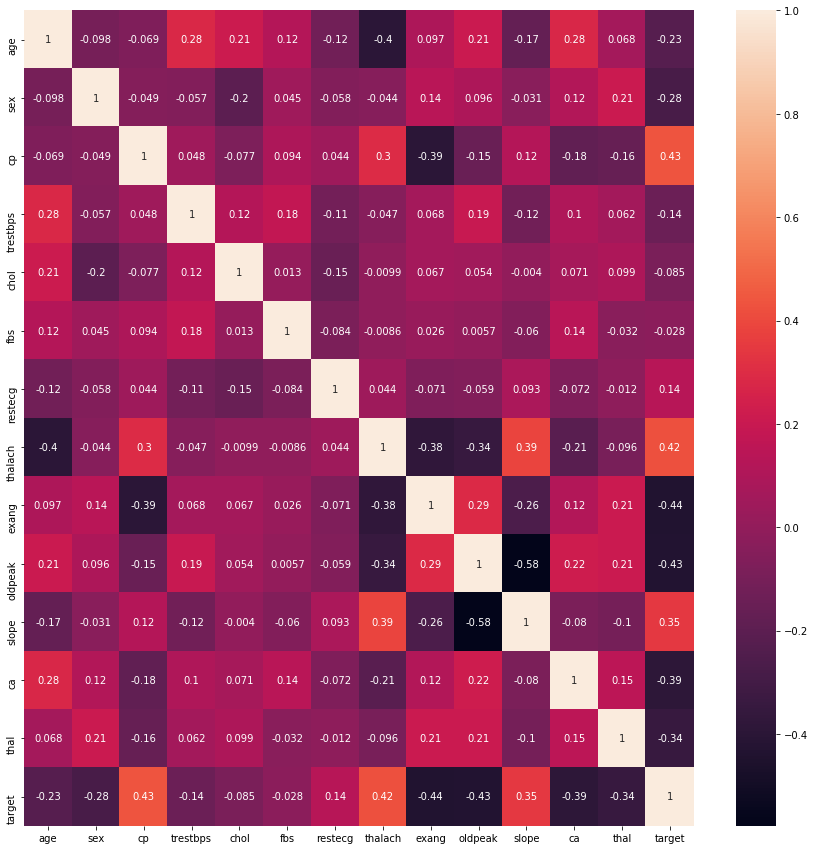

In [6]:
# Матрица корреляции:
plt.figure(figsize=(15,15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

#### EDA совет:
Загрузите случайную выборку из этого набора данных.  
Сколько строк и столбцов в таблице?  
Каковы называния столбцов?  
Какие типы данных у различных столбцов?  
Сколько в каждом из них униальных значений?  
Сколько пропущенных?  
Взгляните на распределения числовых переменных.  

#### Вывод:
* Очень маленький датасет, в данных 303 строчки,
* Нет пропусков в данных
* Сходу можно отметить отрицательную корреляцию **slope** и **oldpeak**

#### Типы признаков: 
* Бинарные: **sex, exang, target**  
* Категориальные: **cp, restecg, thal**  
* Порядковые: **slope, ca**  
* Количественные: **age, trestbps, chol, fbs, thalach, oldpeak**  




## age
В данные попали люди возрастом от 29 до 77 лет

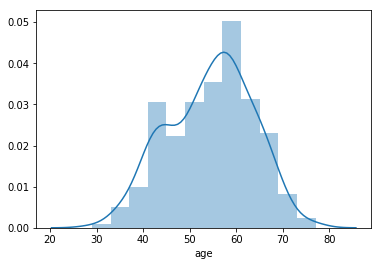

In [7]:
sns.distplot(df.age)

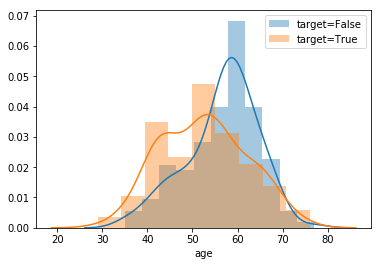

In [8]:
sns.distplot(df[df['target']==0].age, label='target=False')
sns.distplot(df[df['target']==1].age, label='target=True')
plt.legend()

В данной выборке присутствуют люди с 29 до 77 лет.
Стоит отметить, что возраст с **target**=true смещен в сторону более молодых людей

## sex
В данном датасете больше мужчин. Но стоит отметить, что среди "больных" число мужчин и женщин почти одинаковое

In [9]:
df.groupby('sex').size()

sex
0     96
1    207
dtype: int64

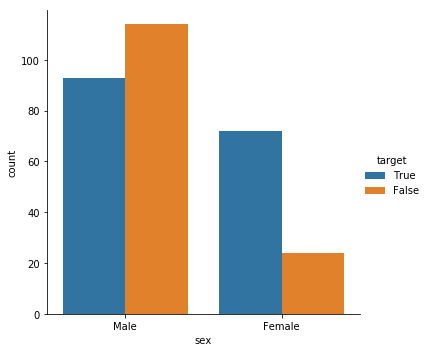

In [10]:
d_sex = {0 : "Female", 1 : "Male"}
d_target = {0 : "False", 1 : "True"}
sns.catplot(x="sex", hue="target", kind="count", data=df.replace({'sex' : d_sex, 'target': d_target}));

## restecg
Нет жесткой уверенности, что это категориальный признак, а не порядковый

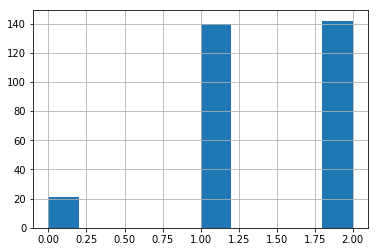

In [11]:
# Гистограммы людей с низким риском сердечных заболеваний
df['slope'].hist()

## target
В целом, выборку можно назвать сбалансированной, число различных классов в target примерно равно по количеству

target
0    138
1    165
dtype: int64


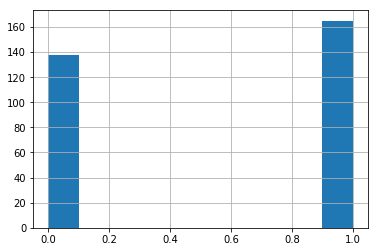

In [12]:
print(df.groupby('target').size())
df['target'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a86e7e240>,
      dtype=object)

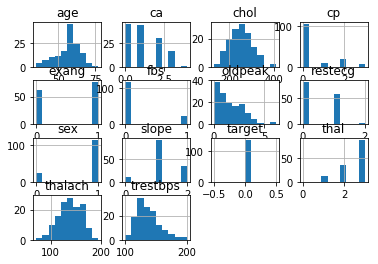

In [13]:
# Гистограммы людей с низким риском сердечных заболеваний
df[df['target']==0].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a86d6d208>,
      dtype=object)

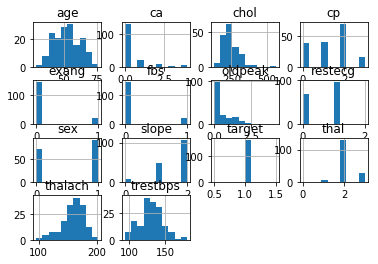

In [14]:
# Гистограммы людей с высоким риском сердечных заболеваний
df[df['target']==1].hist()

## Выбор метрик качества <a name="metrics"></a>

Для нашей задачи бинарной классификации мы можем использовать следующие метрики:  
* Accuracy
* Precision, recall и F-score
* AUC-ROC и AUC-PR
* Logloss


В силу того, что классы сбалансированны, мы можем использовать метрику, я решил брать accuracy


## Предсказывающие модели <a name="models"></a>

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/home/kulinar/epamds/.venv/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [17]:
X_train, X_test , y_train, y_test = train_test_split(df.drop('target',axis=1), df.target, random_state = 32, test_size = 0.2)

In [18]:
# Предобработаем
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Переберем стандартные модели для задачи бинарной классификации и сравним их:
1. Логрегрессия
2. Naive Bayes
3. Случайный лес
4. XGBoost
5. KNN
6. DecisionTreeClassifier
7. Support Vector Classifier
8. CatBoost 

### 1. Логрегрессия

In [19]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
%time model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

CPU times: user 9.33 ms, sys: 0 ns, total: 9.33 ms
Wall time: 101 ms
confussion matrix
[[23  7]
 [ 3 28]]


Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### 2. Наивный байесовский классификатор

In [20]:
m2 = 'Naive Bayes'
nb = GaussianNB()
%time nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

CPU times: user 2.4 ms, sys: 0 ns, total: 2.4 ms
Wall time: 2.31 ms
confussion matrix
[[23  7]
 [ 2 29]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### 3. Случайный лес

In [21]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
%time rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

CPU times: user 43 ms, sys: 0 ns, total: 43 ms
Wall time: 152 ms
confussion matrix
[[23  7]
 [ 2 29]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.94      0.87        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [22]:
# решил подобрать параметры получше
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, bootstrap = True,) 

param_grid = { 
    'n_estimators': [20, 40, 70, 100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state' : [0,32,48],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [23]:
%time CV_rfc.fit(X_train,y_train)

CPU times: user 55.7 s, sys: 2.29 s, total: 58 s
Wall time: 1min 34s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                    

In [24]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
CV_rfc_preds = CV_rfc.predict(X_test)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,CV_rfc_preds))

confussion matrix
[[23  7]
 [ 2 29]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### 4. XGBoost

In [46]:
m4 = 'Extreme Gradient Boost'
# Скорость обучения уменьшил, регуляризацию подкрутил.
# Выбрал остальные данные согласно рекомендациям из: https://www.machinelearningmastery.ru/xgboost-python-mini-course/
xgb = XGBClassifier(learning_rate=0.003, n_estimators=25, max_depth=6, reg_lambda=6, gamma=0.6, subsample=0.52)

# пройдем по сетке параметров
from sklearn.model_selection import StratifiedKFold
n_estimators = [25, 50, 120, 200]
max_depth = [2, 6, 12]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
xgb_grid_search = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
%time xgb_grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 641 ms, sys: 8.88 ms, total: 650 ms
Wall time: 2.49 s


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.6,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.003, max_delta_step=None,
                                     max_depth=6, min_child_weigh...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=6, scale_pos_weight=None,
                                     subsample=0.52, tree_method=None,
                                     validate_parameters=None,

In [47]:
xgb = xgb_grid_search.best_estimator_
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[22  8]
 [ 2 29]]


Accuracy of Random Forest: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



### 5. KNN

In [30]:
m5 = 'K-NeighborsClassifier'
# Покрутив быстро число соседей, выбрал 12 
knn = KNeighborsClassifier(n_neighbors=12)
%time knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

CPU times: user 1.65 ms, sys: 3.76 ms, total: 5.41 ms
Wall time: 58.9 ms
confussion matrix
[[24  6]
 [ 1 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.83      0.97      0.90        31

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.90      0.89      0.88        61



### 6. DecisionTreeClassifier

In [31]:
m6 = 'DecisionTreeClassifier'
# Покрутив быстро макисмальную глубину, выбрал 3 
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 3)
%time dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

CPU times: user 1.39 ms, sys: 7.25 ms, total: 8.64 ms
Wall time: 257 ms
confussion matrix
[[20 10]
 [ 2 29]]


Accuracy of DecisionTreeClassifier: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.74      0.94      0.83        31

    accuracy                           0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



### 7. Support Vector Classifier

In [32]:
m7 = 'Support Vector Classifier'
# быстро покрутив параметры я выбрал регуляризацию (параметр C) около 0.3
svc =  SVC(kernel='rbf', C=0.3)
%time svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

CPU times: user 2.7 ms, sys: 3.37 ms, total: 6.07 ms
Wall time: 28 ms
confussion matrix
[[22  8]
 [ 3 28]]


Accuracy of Support Vector Classifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### 8. CatBoost

In [33]:
from catboost import CatBoostClassifier

In [34]:
m8 = 'CatBoost'
cbc =  CatBoostClassifier()
%time cbc.fit(X_train, y_train)
cbc_predicted = cbc.predict(X_test)
cbc_conf_matrix = confusion_matrix(y_test, cbc_predicted)
cbc_acc_score = accuracy_score(y_test, cbc_predicted)
print("confussion matrix")
print(cbc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",cbc_acc_score*100,'\n')
print(classification_report(y_test,cbc_predicted))

Learning rate set to 0.005621
0:	learn: 0.6886278	total: 699ms	remaining: 11m 38s
1:	learn: 0.6844685	total: 701ms	remaining: 5m 49s
2:	learn: 0.6819700	total: 702ms	remaining: 3m 53s
3:	learn: 0.6772224	total: 703ms	remaining: 2m 54s
4:	learn: 0.6732903	total: 703ms	remaining: 2m 19s
5:	learn: 0.6692836	total: 704ms	remaining: 1m 56s
6:	learn: 0.6656804	total: 705ms	remaining: 1m 40s
7:	learn: 0.6613679	total: 706ms	remaining: 1m 27s
8:	learn: 0.6569540	total: 707ms	remaining: 1m 17s
9:	learn: 0.6522833	total: 708ms	remaining: 1m 10s
10:	learn: 0.6488491	total: 709ms	remaining: 1m 3s
11:	learn: 0.6446905	total: 709ms	remaining: 58.4s
12:	learn: 0.6417641	total: 710ms	remaining: 53.9s
13:	learn: 0.6372232	total: 711ms	remaining: 50.1s
14:	learn: 0.6334522	total: 712ms	remaining: 46.8s
15:	learn: 0.6293590	total: 713ms	remaining: 43.8s
16:	learn: 0.6252374	total: 714ms	remaining: 41.3s
17:	learn: 0.6219864	total: 715ms	remaining: 39s
18:	learn: 0.6186689	total: 715ms	remaining: 36.9s
19

182:	learn: 0.3277333	total: 881ms	remaining: 3.93s
183:	learn: 0.3275192	total: 882ms	remaining: 3.91s
184:	learn: 0.3267895	total: 885ms	remaining: 3.9s
185:	learn: 0.3259120	total: 886ms	remaining: 3.88s
186:	learn: 0.3254320	total: 888ms	remaining: 3.86s
187:	learn: 0.3246637	total: 889ms	remaining: 3.84s
188:	learn: 0.3238461	total: 890ms	remaining: 3.82s
189:	learn: 0.3227572	total: 891ms	remaining: 3.8s
190:	learn: 0.3217452	total: 892ms	remaining: 3.78s
191:	learn: 0.3210605	total: 893ms	remaining: 3.76s
192:	learn: 0.3201282	total: 895ms	remaining: 3.74s
193:	learn: 0.3191576	total: 896ms	remaining: 3.72s
194:	learn: 0.3186310	total: 897ms	remaining: 3.7s
195:	learn: 0.3178486	total: 898ms	remaining: 3.68s
196:	learn: 0.3169084	total: 899ms	remaining: 3.66s
197:	learn: 0.3160935	total: 900ms	remaining: 3.65s
198:	learn: 0.3151517	total: 901ms	remaining: 3.63s
199:	learn: 0.3140582	total: 902ms	remaining: 3.61s
200:	learn: 0.3131553	total: 903ms	remaining: 3.59s
201:	learn: 0.3

357:	learn: 0.2259114	total: 1.07s	remaining: 1.91s
358:	learn: 0.2257210	total: 1.07s	remaining: 1.91s
359:	learn: 0.2254037	total: 1.07s	remaining: 1.9s
360:	learn: 0.2250661	total: 1.07s	remaining: 1.89s
361:	learn: 0.2248926	total: 1.07s	remaining: 1.89s
362:	learn: 0.2244761	total: 1.07s	remaining: 1.88s
363:	learn: 0.2241820	total: 1.07s	remaining: 1.87s
364:	learn: 0.2239504	total: 1.07s	remaining: 1.87s
365:	learn: 0.2236619	total: 1.07s	remaining: 1.86s
366:	learn: 0.2232987	total: 1.07s	remaining: 1.85s
367:	learn: 0.2230404	total: 1.08s	remaining: 1.85s
368:	learn: 0.2226500	total: 1.08s	remaining: 1.84s
369:	learn: 0.2221634	total: 1.08s	remaining: 1.84s
370:	learn: 0.2216861	total: 1.08s	remaining: 1.83s
371:	learn: 0.2211638	total: 1.08s	remaining: 1.82s
372:	learn: 0.2206325	total: 1.08s	remaining: 1.82s
373:	learn: 0.2201194	total: 1.08s	remaining: 1.81s
374:	learn: 0.2196661	total: 1.08s	remaining: 1.81s
375:	learn: 0.2194171	total: 1.08s	remaining: 1.8s
376:	learn: 0.

561:	learn: 0.1662677	total: 1.25s	remaining: 973ms
562:	learn: 0.1661022	total: 1.25s	remaining: 972ms
563:	learn: 0.1659038	total: 1.25s	remaining: 969ms
564:	learn: 0.1656784	total: 1.25s	remaining: 966ms
565:	learn: 0.1653550	total: 1.25s	remaining: 963ms
566:	learn: 0.1651088	total: 1.26s	remaining: 960ms
567:	learn: 0.1649339	total: 1.26s	remaining: 957ms
568:	learn: 0.1646808	total: 1.26s	remaining: 954ms
569:	learn: 0.1645061	total: 1.26s	remaining: 950ms
570:	learn: 0.1642712	total: 1.26s	remaining: 947ms
571:	learn: 0.1641584	total: 1.26s	remaining: 944ms
572:	learn: 0.1639337	total: 1.26s	remaining: 941ms
573:	learn: 0.1637798	total: 1.26s	remaining: 938ms
574:	learn: 0.1635635	total: 1.26s	remaining: 935ms
575:	learn: 0.1633301	total: 1.26s	remaining: 932ms
576:	learn: 0.1631390	total: 1.27s	remaining: 929ms
577:	learn: 0.1629759	total: 1.27s	remaining: 926ms
578:	learn: 0.1627474	total: 1.27s	remaining: 923ms
579:	learn: 0.1626285	total: 1.27s	remaining: 920ms
580:	learn: 

751:	learn: 0.1293586	total: 1.43s	remaining: 470ms
752:	learn: 0.1291853	total: 1.43s	remaining: 469ms
753:	learn: 0.1291007	total: 1.43s	remaining: 467ms
754:	learn: 0.1288837	total: 1.43s	remaining: 465ms
755:	learn: 0.1287391	total: 1.44s	remaining: 463ms
756:	learn: 0.1286466	total: 1.44s	remaining: 462ms
757:	learn: 0.1284902	total: 1.44s	remaining: 460ms
758:	learn: 0.1283598	total: 1.44s	remaining: 458ms
759:	learn: 0.1282114	total: 1.44s	remaining: 455ms
760:	learn: 0.1281096	total: 1.44s	remaining: 453ms
761:	learn: 0.1280299	total: 1.44s	remaining: 451ms
762:	learn: 0.1278263	total: 1.45s	remaining: 449ms
763:	learn: 0.1276700	total: 1.45s	remaining: 447ms
764:	learn: 0.1275633	total: 1.45s	remaining: 445ms
765:	learn: 0.1274498	total: 1.45s	remaining: 443ms
766:	learn: 0.1273250	total: 1.45s	remaining: 441ms
767:	learn: 0.1270974	total: 1.45s	remaining: 438ms
768:	learn: 0.1269192	total: 1.45s	remaining: 436ms
769:	learn: 0.1267701	total: 1.45s	remaining: 434ms
770:	learn: 

988:	learn: 0.0977802	total: 1.79s	remaining: 19.9ms
989:	learn: 0.0976457	total: 1.79s	remaining: 18.1ms
990:	learn: 0.0975059	total: 1.8s	remaining: 16.3ms
991:	learn: 0.0973035	total: 1.8s	remaining: 14.5ms
992:	learn: 0.0971950	total: 1.8s	remaining: 12.7ms
993:	learn: 0.0971090	total: 1.8s	remaining: 10.9ms
994:	learn: 0.0970555	total: 1.8s	remaining: 9.05ms
995:	learn: 0.0969381	total: 1.8s	remaining: 7.24ms
996:	learn: 0.0968044	total: 1.8s	remaining: 5.43ms
997:	learn: 0.0967716	total: 1.8s	remaining: 3.62ms
998:	learn: 0.0965993	total: 1.81s	remaining: 1.81ms
999:	learn: 0.0964891	total: 1.81s	remaining: 0us
CPU times: user 2.28 s, sys: 283 ms, total: 2.57 s
Wall time: 3.71 s
confussion matrix
[[23  7]
 [ 3 28]]


Accuracy of Support Vector Classifier: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84 

## Интерпретация результата <a name="result"></a>

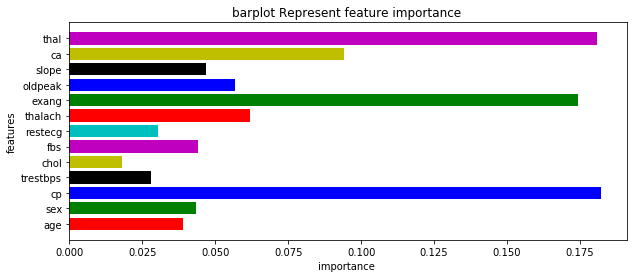

In [48]:
# Посмотрим на важность фич для xgb
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

In [49]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine','CatBoost'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100, cbc_acc_score*100]})
model_ev.sort_values('Accuracy' , ascending=False)

,Accuracy,Model
4,88.524590,K-Nearest Neighbour
1,85.245902,Naive Bayes
2,85.245902,Random Forest
0,83.606557,Logistic Regression
3,83.606557,Extreme Gradient Boost
7,83.606557,CatBoost
6,81.967213,Support Vector Machine
5,80.327869,Decision Tree


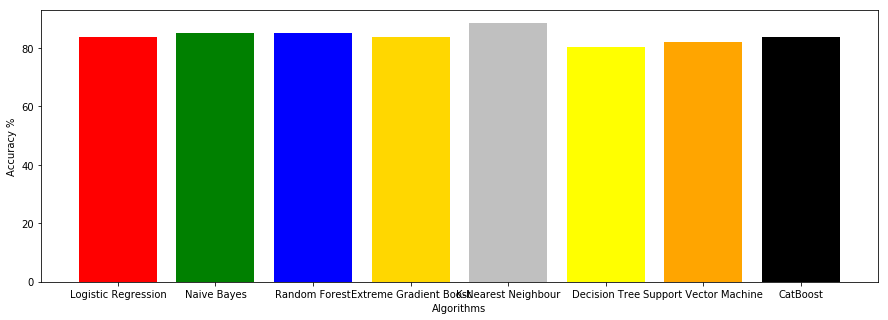

In [50]:
colors = ['red','green','blue','gold','silver','yellow','orange', 'black',]
plt.figure(figsize=(15,5))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color = colors)
plt.show()

### Вывод:
Наилучшие результаты показал KNN 
Была достигнута точность в 88%
на тестовой выборке был дан один ложноотрицательный результат и 6 ложноположительных. С учетом специфики медицины, лучше выдать ложноположительный результат при предсказании вероятных сердечных заболеваний, что и делает представленная модель на данной тестовой выборке

In [52]:
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  6]
 [ 1 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.83      0.97      0.90        31

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.90      0.89      0.88        61



## Предложения по улучшению <a name="improvement"></a>
Данные:
* Так как датасет маленький, то можно попробовать использовать большее число фич из большого исходного датасета
* Если есть возможность самостоятельно собирать данные, то можно расширить анкету и добавить вопрос про курение. Также можно попробовать расширить аудиторию, среди которой проводится опрос

Фичаинженеринг
* Использовать one-hot-encoding для кодирования категориальных признаков в бинарные
* Попробовать логические операции на бинарных признаках, например умножение
* Попробовать разбить количественные переменные в категориальные (например по гистограмме)

Модели
* Ещё покрутить параметры у моделей, можно точно добиться лучших результатов от xgb, catboost, svm
* Сделать ансамбль (в одном из кернелов улучшили на пару процентов так результат)